### Importing the Libraries

In [1]:
import pandas as pd #data processing and I/O operations
import numpy as np #Linear Algebra
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly

#!pip install plotly

### Import the dataset

In [2]:
#Import the winter olympics
winter = pd.read_csv('/content/winter.csv')
winter.head(10)

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold
5,1924,Chamonix,Biathlon,Biathlon,"JULEN, Alphonse",SUI,Men,Military Patrol,Gold
6,1924,Chamonix,Biathlon,Biathlon,"JULEN, Ant.",SUI,Men,Military Patrol,Gold
7,1924,Chamonix,Biathlon,Biathlon,"VAUCHER, D.",SUI,Men,Military Patrol,Gold
8,1924,Chamonix,Biathlon,Biathlon,"BREMER, V.E.",FIN,Men,Military Patrol,Silver
9,1924,Chamonix,Biathlon,Biathlon,"ESKELINEN, A.",FIN,Men,Military Patrol,Silver


In [3]:
winter.tail(10)

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
5760,2014,Sochi,Skiing,Snowboard,"FARRINGTON, Kaitlyn",USA,Women,Half-Pipe,Gold
5761,2014,Sochi,Skiing,Snowboard,"DUJMOVITS, Julia",AUT,Women,Parallel Slalom,Gold
5762,2014,Sochi,Skiing,Snowboard,"KARSTENS, Anke",GER,Women,Parallel Slalom,Silver
5763,2014,Sochi,Skiing,Snowboard,"KOBER, Amelie",GER,Women,Parallel Slalom,Bronze
5764,2014,Sochi,Skiing,Snowboard,"RUKAJARVI, Enni",FIN,Women,Slopestyle,Silver
5765,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze
5766,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold
5767,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver
5768,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold
5769,2014,Sochi,Skiing,Snowboard,"TRESPEUCH, Chloe",FRA,Women,Snowboard Cross,Bronze


In [4]:
# Import summer dataset
summer = pd.read_csv("/content/summer.csv")
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [5]:
#Import the dictionary dataset
dict = pd.read_csv('/content/dictionary.csv')
dict.head()

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN


# Analyze the Summer Dataset:

In [7]:
summer.rename(columns={'Country' : 'Code'}, inplace=True)

In [8]:
summer.head()

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [9]:
summer = pd.merge(summer, dict, on='Code', how='outer')

In [10]:
summer.head()

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country,Population,GDP per Capita
0,1896.0,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary,9844686.0,12363.54346
1,1896.0,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold,Hungary,9844686.0,12363.54346
2,1896.0,Athens,Athletics,Athletics,"SZOKOLYI, Alajos",HUN,Men,100M,Bronze,Hungary,9844686.0,12363.54346
3,1896.0,Athens,Athletics,Athletics,"DANI, Nandor",HUN,Men,800M,Silver,Hungary,9844686.0,12363.54346
4,1896.0,Athens,Athletics,Athletics,"KELLNER, Gyula",HUN,Men,Marathon,Bronze,Hungary,9844686.0,12363.54346


In [11]:
summer.describe()

,Year,Population,GDP per Capita
count,31165.000000,2.576600e+04,25200.000000
mean,1970.482785,1.482346e+08,36746.158771
std,33.158416,2.669055e+08,19584.821782
min,1896.000000,1.022200e+04,277.068309
25%,1948.000000,1.138956e+07,16088.277587
50%,1980.000000,6.080208e+07,41313.313995
75%,2000.000000,1.440968e+08,56115.718426
max,2012.000000,1.371220e+09,101449.968168


In [12]:
summer.describe(include=['O'])

,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
count,31165,31165,31165,31165,31233,31165,31165,31165,25814
unique,22,43,67,22762,219,2,666,3,201
top,London,Aquatics,Athletics,"PHELPS, Michael",USA,Men,Football,Gold,United States
freq,3567,4170,3638,22,4585,22746,1497,10486,4585


## Plotting the Choropleth Map

In [13]:
medals_map = summer.groupby(['Country', 'Code'])['Medal'].count().reset_index()
medals_map = medals_map[medals_map['Medal']>0]

In [14]:
fig = px.choropleth(medals_map, locations="Code", color='Medal', hover_name='Country',
                   color_continuous_scale=px.colors.sequential.Plasma)

fig.show()

### Most successful male athlete 

In [17]:
print("Most successful male athlete is: ", summer[summer['Gender']=='Men']['Athlete'].value_counts()[:1].index[0],
      'with', summer[summer['Gender']=='Men']['Athlete'].value_counts().values[0], 'medals')

Most successful male athlete is:  PHELPS, Michael with 22 medals


### Most successful female athlete

In [16]:
print("Most successful female athlete is: ", summer[summer['Gender']=='Women']['Athlete'].value_counts()[:1].index[0],
      'with', summer[summer['Gender']=='Women']['Athlete'].value_counts().values[0], 'medals')

Most successful female athlete is:  LATYNINA, Larisa with 18 medals


### Who won the most medals

In [18]:
medals = summer.groupby(['Athlete', 'Medal'])['Sport'].count().reset_index().sort_values(by='Sport', ascending=False)

In [19]:
medals

,Athlete,Medal,Sport
18383,"PHELPS, Michael",Gold,18
13465,"LEWIS, Carl",Gold,9
17060,"NURMI, Paavo",Gold,9
22145,"SPITZ, Mark",Gold,9
13061,"LATYNINA, Larisa",Gold,9
...,...,...,...
9498,"HODGES, Laura",Bronze,1
9497,"HODGE, Percy",Gold,1
9496,"HODGE, Megan",Silver,1
9495,"HODGE, Daniel Allen",Silver,1


In [21]:
medals = medals.drop_duplicates(subset=['Medal'], keep='first') 

In [22]:
medals.columns = [['Athlete', 'Medal', 'Count']]

In [23]:
medals

,Athlete,Medal,Count
18383,"PHELPS, Michael",Gold,18
5387,"DITYATIN, Aleksandr",Silver,6
16635,"NEMOV, Alexei",Bronze,6


## Visualize the medal distribution for the top 10 countries

In [24]:
medals_country = summer.groupby(['Country', 'Medal'])['Gender'].count().reset_index().sort_values(by='Gender', 
                                                                                                  ascending=False)

In [25]:
medals_country

,Country,Medal,Gender
283,United States,Gold,2235
284,United States,Silver,1252
282,United States,Bronze,1098
281,United Kingdom,Silver,621
279,United Kingdom,Bronze,553
...,...,...,...
264,Trinidad and Tobago,Gold,1
75,Ecuador,Gold,1
166,Luxembourg,Gold,1
132,Israel,Gold,1


In [26]:
medals_country = medals_country.pivot('Country', 'Medal', 'Gender').fillna(0)

In [27]:
medals_country

Medal,Bronze,Gold,Silver
Country,,,
Afghanistan,2.0,0.0,0.0
Algeria,8.0,5.0,2.0
Argentina,91.0,69.0,99.0
Armenia,8.0,1.0,2.0
Australia,472.0,312.0,405.0
...,...,...,...
Venezuela,8.0,2.0,2.0
Vietnam,0.0,0.0,2.0
Virgin Islands*,0.0,0.0,1.0


In [28]:
top = medals_country.sort_values(by='Gold', ascending=False)[:10]

In [29]:
top

Medal,Bronze,Gold,Silver
Country,,,
United States,1098.0,2235.0,1252.0
United Kingdom,553.0,546.0,621.0
Italy,404.0,476.0,416.0
Germany,475.0,452.0,378.0
Hungary,351.0,412.0,316.0
France,497.0,408.0,491.0
Sweden,328.0,349.0,367.0
Australia,472.0,312.0,405.0
China,221.0,290.0,296.0


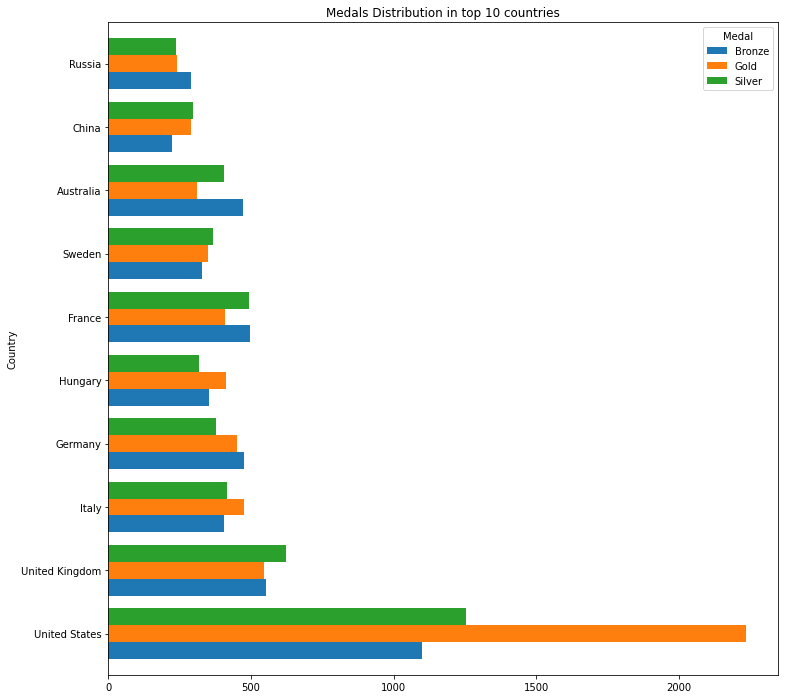

In [30]:
fig = top.plot.barh(width=0.8)
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.title("Medals Distribution in top 10 countries")
plt.show()

## Analyze the winter Dataset:

In [31]:
winter.rename(columns={'Country':'Code'}, inplace=True)

In [32]:
winter = pd.merge(winter, dict, on='Code', how='outer')

In [33]:
winter.head()

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country,Population,GDP per Capita
0,1924.0,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze,France,66808385.0,36205.568102
1,1924.0,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze,France,66808385.0,36205.568102
2,1924.0,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze,France,66808385.0,36205.568102
3,1924.0,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze,France,66808385.0,36205.568102
4,1924.0,Chamonix,Curling,Curling,"ALDEERT, H.",FRA,Men,Curling,Bronze,France,66808385.0,36205.568102


In [34]:
winter.describe(include='all')

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country,Population,GDP per Capita
count,5770.000000,5770,5770,5770,5770,5934,5770,5770,5770,4990,4.985000e+03,4956.000000
unique,NaN,19,7,15,3761,209,2,83,3,201,NaN,NaN
top,NaN,Sochi,Skiing,Ice Hockey,"BJOERNDALEN, Ole Einar",USA,Men,Ice Hockey,Silver,United States,NaN,NaN
freq,NaN,612,1781,1536,13,653,3944,1536,1930,653,NaN,NaN
mean,1986.350433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.536055e+07,44738.744452
std,24.263673,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.953490e+08,19271.499099
min,1924.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.022200e+04,277.068309
25%,1972.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.286976e+06,41313.313995
50%,1994.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.585177e+07,43248.529909
75%,2006.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.141314e+07,56115.718426


In [35]:
winter.describe()

,Year,Population,GDP per Capita
count,5770.000000,4.985000e+03,4956.000000
mean,1986.350433,9.536055e+07,44738.744452
std,24.263673,1.953490e+08,19271.499099
min,1924.000000,1.022200e+04,277.068309
25%,1972.000000,8.286976e+06,41313.313995
50%,1994.000000,3.585177e+07,43248.529909
75%,2006.000000,8.141314e+07,56115.718426
max,2014.000000,1.371220e+09,101449.968168


In [43]:
winter.describe(include=np.object)

,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
count,5770,5770,5770,5770,5934,5770,5770,5770,4990
unique,19,7,15,3761,209,2,83,3,201
top,Sochi,Skiing,Ice Hockey,"BJOERNDALEN, Ole Einar",USA,Men,Ice Hockey,Silver,United States
freq,612,1781,1536,13,653,3944,1536,1930,653


In [44]:
medals_map = winter.groupby(['Country','Code'])['Medal'].count().reset_index()
medals_map = medals_map[medals_map['Medal']>0]
fig = px.choropleth(medals_map, locations='Code',
                   color='Medal',
                   hover_name='Country',
                   color_continuous_scale=px.colors.sequential.Plasma)

fig.show()

### Most successful Male athlete

In [45]:
print('The most successful male athlete in winter olympics is', 
      winter[winter['Gender'] == 'Men']['Athlete'].value_counts()[:1].index[0], 'with',
     winter[winter['Gender'] == 'Men']['Athlete'].value_counts()[:1].values[0], 'medals')

The most successful male athlete in winter olympics is BJOERNDALEN, Ole Einar with 13 medals


### Most successful female athlete

In [46]:
print('The most successful female athlete in winter olympics is', 
      winter[winter['Gender'] == 'Women']['Athlete'].value_counts()[:1].index[0], 'with',
     winter[winter['Gender'] == 'Women']['Athlete'].value_counts()[:1].values[0], 'medals')

The most successful female athlete in winter olympics is BELMONDO, Stefania with 10 medals


### Medal Distribution in top 10 countries [Winter Olympics]:

In [47]:
medals_country = winter.groupby(['Country', 'Medal'])['Gender'].count().reset_index().sort_values(by='Gender', ascending=False)

In [68]:
winter['Gender'].value_counts()

Men      3944
Women    1826
Name: Gender, dtype: int64

In [64]:
sum([int(i) for i in medals_country['Gender']])

4826

In [65]:
medals_country

,Country,Medal,Gender
97,United States,Silver,319
16,Canada,Gold,315
31,Finland,Bronze,221
17,Canada,Silver,203
83,Sweden,Bronze,177
...,...,...,...
51,"Korea, North",Bronze,1
28,Estonia,Bronze,1
21,Croatia,Bronze,1
13,Bulgaria,Gold,1


In [49]:
top = medals_country.pivot('Country', 'Medal', 'Gender').fillna(0)

In [50]:
top

Medal,Bronze,Gold,Silver
Country,,,
Australia,7.0,5.0,3.0
Austria,103.0,79.0,98.0
Belarus,5.0,6.0,4.0
Belgium,7.0,2.0,4.0
Bulgaria,3.0,1.0,2.0
Canada,107.0,315.0,203.0
China,36.0,16.0,30.0
Croatia,1.0,4.0,6.0
Czech Republic,35.0,28.0,12.0


In [51]:
top = top.sort_values(by='Gold', ascending=False)[:10]

In [52]:
top

Medal,Bronze,Gold,Silver
Country,,,
Canada,107.0,315.0,203.0
United States,167.0,167.0,319.0
Norway,127.0,159.0,171.0
Germany,97.0,137.0,126.0
Sweden,177.0,127.0,129.0
Russia,79.0,94.0,90.0
Austria,103.0,79.0,98.0
Switzerland,132.0,76.0,77.0
Finland,221.0,66.0,147.0


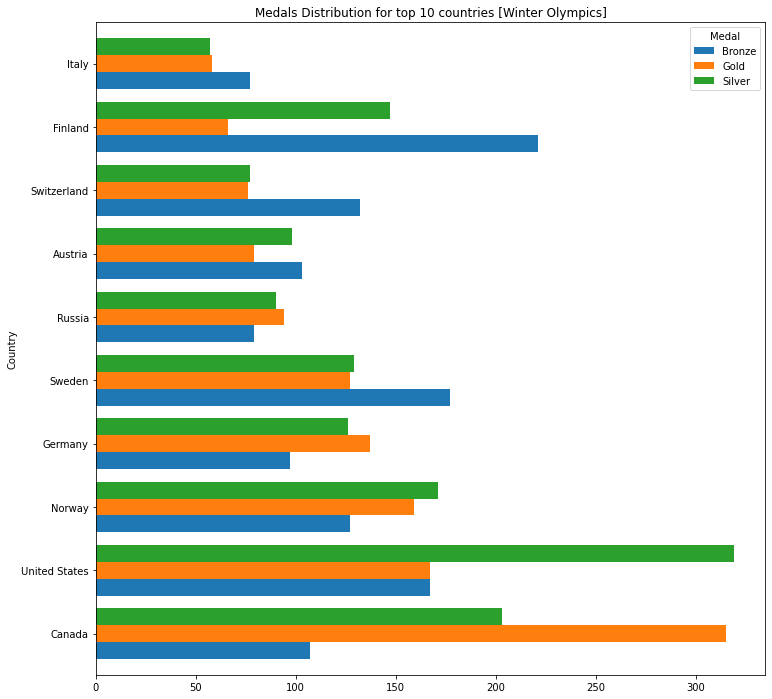

In [53]:
fig = top.plot.barh(width=0.8)
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.title('Medals Distribution for top 10 countries [Winter Olympics]')
plt.show()